In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
fileName = "./reactivity_numberofcrowders.dat"
data = np.loadtxt(fileName)

In [3]:
nSpheres = data[:,0]
N = 2* np.max(nSpheres) # assuming here that there are twice as many places to stick ligand relative to N crowders
cSpheres=nSpheres/np.float(N) # not quite correct, but proportionalitys.b. ok

To compute configuration entropy for ligand we assume a lattice of N subvolumes into which to stick and ligand,
and C crowders that can 'plug' a given subvolume
U = H - TS,
let H =0, s.t. U = -TS,
S = k log W,
X = N-C # number of spots available for ligand after placing C crowders
W ~ X!/(L!(X-L)!) ~ X!/(X-L)!*1/L!

assuming L<<N and using Stirling approximation we obtain


W ~ X**L / L!

log W ~ L log X - (L log L + L)

log W = L log (N-C) - L log L - L

To estimate the average energy felt by the ligand due to binding the target we use
kon = k0 exp(-U/kT)
log(kon/k0) = -U/kT

In [4]:
print(np.max(cSpheres))

0.5


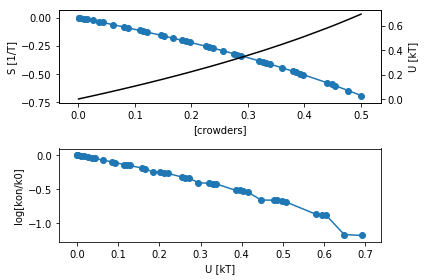

In [5]:
H=0.
L=1
T=1.
N=1. # arbitrary, but should normalize somehow
Ss = L*np.log(N-cSpheres) - L*np.log(L) - L
offset = 1. # using this since sloppy w units, etc
Ss += offset
fig,(axl,ax2) = plt.subplots(2)
# S vs U
axl.scatter(cSpheres, Ss)
axl.plot(cSpheres, Ss,label='S')
axl.set_ylabel("S [1/T]")

axr = axl.twinx()

Us = H - T*Ss
axr.plot(cSpheres, Us,'k')
axl.set_xlabel("[crowders]")
axr.set_ylabel("U [kT]")
#
kons = data[:,1]
k0 = np.max(kons)
lkok0 = np.log(kons/k0)
ax2.scatter(Us,lkok0)
ax2.plot(Us,lkok0)
ax2.plot()
ax2.set_ylabel("log[kon/k0]")
ax2.set_xlabel("U [kT]")
#
plt.tight_layout()

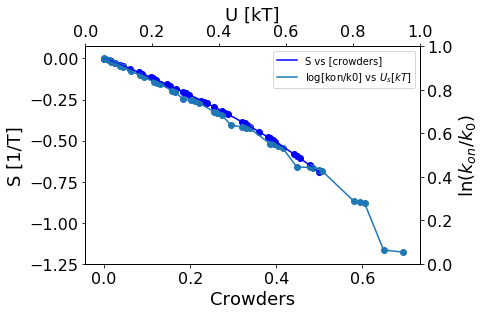

In [6]:
#This is what I add to Pete notebook
H=0.
L=1
T=1.
N=1. # arbitrary, but should normalize somehow
Ss = L*np.log(N-cSpheres) - L*np.log(L) - L
offset = 1. # using this since sloppy w units, etc
Ss += offset
fig,(axl) = plt.subplots(1)
# S vs U
axl.scatter(cSpheres, Ss,color="blue")
axl.plot(cSpheres, Ss,label='S vs [crowders]',color="blue")
axl.set_ylabel("S [1/T]",fontsize=18)
axl.scatter(Us,lkok0)
#sns.scatterplot(Us,lkok,hue=cSpheres,size=cSpheres,sizes=(20, 200))
axl.plot(Us,lkok0, label='log[kon/k0] vs $U_s[kT]$')
axr = axl.twinx()
axr.tick_params(labelsize=16)
axu = axl.twiny()
axu.tick_params(labelsize=16)
Us = H - T*Ss
#axr.plot(cSpheres, Us,'k')

axl.set_xlabel("Crowders",fontsize=18)
axl.tick_params(axis='y',labelsize=16)
axl.tick_params(axis='x',labelsize=16)
axr.set_ylabel("$\ln{(k_{on}/k_0)}$",fontsize=18)
axu.set_xlabel("U [kT]",fontsize=18)
#
axl.legend()
kons = data[:,1]
k0 = np.max(kons)
lkok0 = np.log(kons/k0)

#ax2.scatter(Us,lkok0)
#ax2.plot(Us,lkok0)
#ax2.set_ylabel("log[kon/k0]")
#ax2.set_xlabel("U [kT]")
#
params = {'legend.fontsize': 14,'legend.handlelength': 3}
plt.rcParams.update(params)
plt.rc('figure', figsize=(10, 5))
plt.gcf().savefig("Energy_of_reactivity.png",dpi=500)
plt.show()

AttributeError: 'module' object has no attribute 'scatterplot'

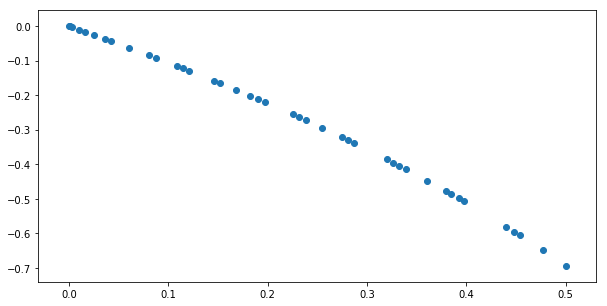

In [7]:
#This is what I add to Pete notebook
H=0.
L=1
T=1.
N=1. # arbitrary, but should normalize somehow
Ss = L*np.log(N-cSpheres) - L*np.log(L) - L
offset = 1. # using this since sloppy w units, etc
Ss += offset
fig,(axl) = plt.subplots(1)
# S vs U
axl.scatter(cSpheres, Ss)
ax = sns.scatterplot(x=cSpheres, y=Ss,hue="size", size="size",data=tips)
axl.plot(cSpheres, Ss,label='S vs [crowders]')
axl.set_ylabel("S [1/T]")
axl.scatter(Us,lkok0)
axl.plot(Us,lkok0, label='log[kon/k0] vs U[kT]')
axr = axl.twinx()
axu = axl.twiny()
Us = H - T*Ss
#axr.plot(cSpheres, Us,'k')

axl.set_xlabel("Crowders",fontsize=12)
axr.set_ylabel("log[kon/k0]",fontsize=12)
axu.set_xlabel("U [kT]",fontsize=12)
#
axl.legend()
kons = data[:,1]
k0 = np.max(kons)
lkok0 = np.log(kons/k0)

#ax2.scatter(Us,lkok0)
#ax2.plot(Us,lkok0)
#ax2.set_ylabel("log[kon/k0]")
#ax2.set_xlabel("U [kT]")
#

plt.gcf().savefig("Energy_of_reactivity.png",dpi=500)
plt.show()

Since we see a (potential!!) linear relationship between log (kon/k0) and U, we can use the computed kon values
to estimate U wrt crowder density, etc

In [ ]:
Us = -np.log(kons/k0)
plt.plot(cSpheres,Us)
plt.ylabel("U (est)")
plt.xlabel("[crowders]")

Apply same concept to reactivity_crowders-pot.dat

Note that we use the k0 from the uncrowded case as the basal rate. This figure demonstrates that
1. U assumes negative (favorable) values when attractive interactions between crowders and substrates
are assumed
2. Under V=0 conditions, U assumes positive (unfavorble) values as the crowder density increases
TODO: plot U curves for different crowder densities (phi=1, phi =0.75 etc) and increasingly attractive V0 values
(until kon starts to decline) Should see that there is a minimum in U at elevated V0 values when croders are
present


Hear we tried different density of crowders and different potentials to see how U is changing from equation U ~ ln(kon/k0) .
note: make sure that the strong voltage you are using is in the limit that we can use our relations like Poisson-Boltzmann relation.

In [8]:
data1 = np.loadtxt("./1250_crowders.dat")
vs1,kons1 = data1[:,0],data1[:,1]
###
data3 = np.loadtxt("./1000_crowders.dat")
vs3,kons3 = data3[:,0],data3[:,1]
###
data5 = np.loadtxt("./750_crowders.dat")
vs5,kons5 = data5[:,0],data5[:,1]
####
data7 = np.loadtxt("./500_crowders.dat")
vs7,kons7 = data7[:,0],data7[:,1]
###
data2 = np.loadtxt("./reactivity_crowders-pot.dat")
vs2,kons2 = data2[:,0],data2[:,1]

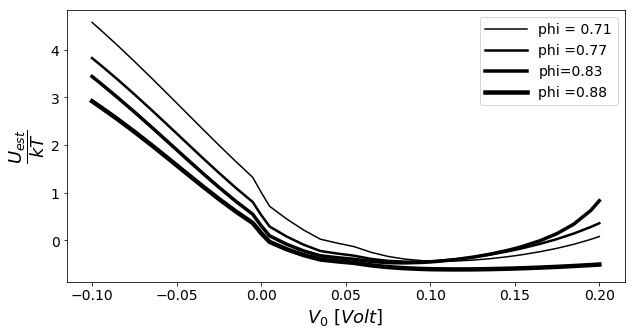

In [9]:
Us1 = -np.log(kons1/k0)
Us3 = -np.log(kons3/k0)
Us5 = -np.log(kons5/k0)
Us7 = -np.log(kons7/k0)
Us2 = -np.log(kons2/k0)
#plt.scatter(vs1,Us1, label="phi = 0.71, $N_c$=1250")
plt.plot(vs1,Us1,label='phi = 0.71',color='black',linewidth=1.5)
#plt.scatter(vs3,Us3, label="phi =0.77, $N_c$=1000")
plt.plot(vs3,Us3,label="phi =0.77",color='black',linewidth=2.5)
#plt.scatter(vs5,Us5, label="phi=0.83, $N_c$=750")
plt.plot(vs5,Us5,label="phi=0.83",color='black',linewidth=3.5)
#plt.scatter(vs7,Us7, label="phi =0.88, $N_c$=500")
plt.plot(vs7,Us7,label="phi =0.88",color='black',linewidth=4.5)
#plt.scatter(vs2,Us2, label="phi =0.94 , $N_c$=250")
#plt.plot(vs2,Us2,label="phi =0.94",color='black',linewidth=5.5)
# inconvenient, but will demonstrate effect
#for idx in [10,20,30]:
#    plt.scatter(np.array([0]),np.array(Us[idx]),label="cphere=%f"%(cSpheres[idx]))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
import matplotlib
plt.ylabel("$\dfrac{{U}_{est}}{kT}$", fontsize=18)
plt.xlabel("${V}_{0}$ $[Volt]$",fontsize=18)
matplotlib.rc('figure', figsize=(10, 5))
leg = plt.legend(loc=3, bbox_to_anchor=(0.5,0.5), ncol=1)
plt.gcf().savefig("Potential_reactivity_A.png",dpi=700)
plt.legend(loc=0)

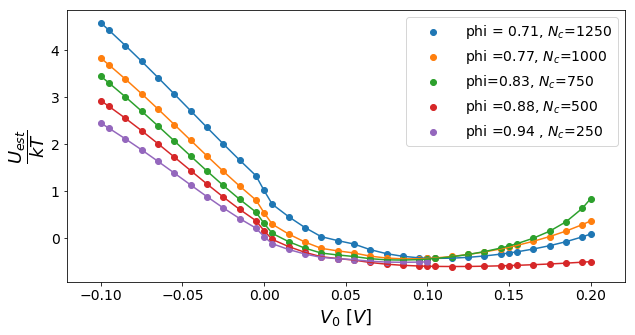

In [10]:
Us1 = -np.log(kons1/k0)
Us3 = -np.log(kons3/k0)
Us5 = -np.log(kons5/k0)
Us7 = -np.log(kons7/k0)
Us2 = -np.log(kons2/k0)
plt.scatter(vs1,Us1, label="phi = 0.71, $N_c$=1250")
plt.plot(vs1,Us1)
plt.scatter(vs3,Us3, label="phi =0.77, $N_c$=1000")
plt.plot(vs3,Us3)
plt.scatter(vs5,Us5, label="phi=0.83, $N_c$=750")
plt.plot(vs5,Us5)
plt.scatter(vs7,Us7, label="phi =0.88, $N_c$=500")
plt.plot(vs7,Us7)
plt.scatter(vs2,Us2, label="phi =0.94 , $N_c$=250")
plt.plot(vs2,Us2)
# inconvenient, but will demonstrate effect
#for idx in [10,20,30]:
#    plt.scatter(np.array([0]),np.array(Us[idx]),label="cphere=%f"%(cSpheres[idx]))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
import matplotlib
plt.ylabel("$\dfrac{{U}_{est}}{kT}$", fontsize=18)
plt.xlabel("${V}_{0}$ $[V]$",fontsize=18)
matplotlib.rc('figure', figsize=(10, 5))
leg = plt.legend(loc=3, bbox_to_anchor=(0.5,0.5), ncol=1)
plt.gcf().savefig("Potential_reactivity_A.png",dpi=700)
plt.legend(loc=0)